<a href="https://colab.research.google.com/github/ShayHav/MachineLearning/blob/main/Exercise%203%20Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Names and IDs
 1. Shay Havivyan
 2. Shahar Lankry

# I. Condorcet's Jury Theorem (1785) (30 points)

Assume voter probability to be correct as $p>.5$.

1. Plot the probability a jury of $n$ voters (odd) is correct as a function of $p$ for different $n$ using Monte-Carlo simulations (sampling and averaging).

2. Prove that as number of jury members grows, $n\rightarrow\infty$, the  jury majority becomes correct  $\Pr(\text{correct}) \rightarrow 1$ (**hint**: use the law of large numbers).

Notes: Avoid loops where possible.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

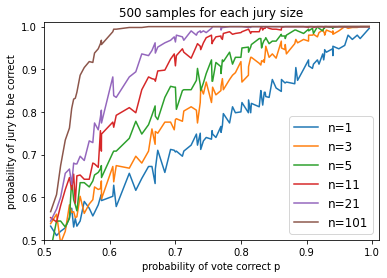

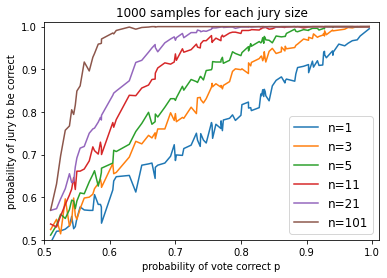

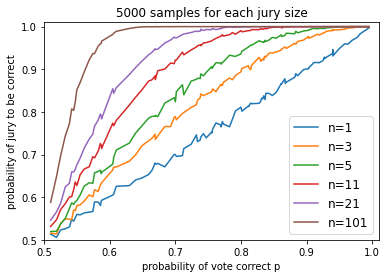

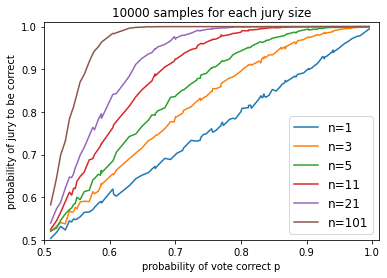

In [ ]:
# Implement here
from numpy import random
from scipy.stats import binom, bernoulli

# generating 500 random samples of probabilities
probs = random.uniform(0.51,1,100)
probs = np.append(probs,0.51)
probs = np.sort(probs)

#probs = np.linspace(0.5,1,30)

# array of samples for number of jury
n = [1,3,5,11,21,101]

# num of iterations on jury size
samples_repeat = [500,1000,5000,10000]


for samples_num in samples_repeat:
  average_jury_correct_prob = []
  # for each n,p, generate samples_num juries of size n, each value is bernoulli 
  # vaiable. 
  for jury_number in n:
    for p in probs: 
      total_jury_correct = 0;
      for i in range(samples_num):
        # generating the sequence
        bernoulli_jury = [random.random() for i in range(jury_number)]
        bernoulli_jury = np.where(bernoulli_jury < p, 1, 0)
        # checking if the sequence was correct
        if np.sum(bernoulli_jury) >= (len(bernoulli_jury) + 1) / 2:
          total_jury_correct+=1
      # calculate probability of jury to be correct and append it to the array
      prob_correct = total_jury_correct / samples_num
      average_jury_correct_prob.append((p,prob_correct))
      # modify the array of match points 
    x = [x[0] for x in average_jury_correct_prob]
    y = [y[1] for y in average_jury_correct_prob]
   # x,y = np.asarray(x), np.asarray(y)
    average_jury_correct_prob = []
    plt.plot(x,y, label=f'n={jury_number}')
  plt.title(f"{samples_num} samples for each jury size")
  plt.xlabel("probability of vote correct p")
  plt.ylabel("probability of jury to be correct")
  plt.xlim([0.5,1.01])
  plt.ylim([0.5,1.01])
  plt.legend(prop={'size': 12})
  plt.show()




Your proves goes here:

Assuming we have random variables $X = x_1, x_2, .....x_n$, with the following distribution: 

$p(x_i == 1) = p$

$p(x_i == -1) = 1-p.$ (Bernoulli distrubution)

also, 

$S_n = Σ x_i$

$ \overline X_n = \frac{S_n}{n}$

Assuming our true label is 1, $Pr(x_i=1) = p$ and
$Pr(correct) = Pr(S_n > 0)$, since we want more than half of the $x_i$ will be positive. 

definition: $α = p -\frac{1}{2}> 0$ , since we know $p > \frac{1}{2}$

for each $x_i, E[x_i] = 1 ⋅ Pr(x==1) -1⋅Pr(x==-1) = p - (1-p)$  

means, $E[x_i] = \frac{1}{2} + α - (1 - \frac{1}{2} - α ) = 2⋅α $

from the weak law of large numbers, when $n ⟶ ∞$, 
$Pr(|\overline X_n - 𝜇| < ϵ) ⟶ 1$ 

choosing $ϵ = 2⋅α$:

$Pr(S_n > 0) = Pr(\frac{S_n}{n} > 0) >= Pr(\overline X_n > 0  \cap  \overline X_n < 4⋅α) = Pr(|\overline X_n - 2⋅α| < 2⋅α)$

and according to the weak low of large numbers:
$ Pr(|\overline X_n - 2⋅α| < 2⋅α) ⟶ 1 $ 

so, 

$Pr(S_n > 0) ⟶ 1$ and we proved what we intended. 

# II. AdaBoost (70 points)
* Use `AdaBoostClassifier` model from sklearn.ensemble to find a strong classifier on the sample set given below, using $n$ weak learners:
    - For the base weak learners, use a ***linear*** SVM classifier (use `LinearSVC` from sklearn.svm) with the next parameters:
        - *tol=1e-5,loss='hinge', C=1e5, max_iter=1e6*
    - Split the sample set into 2/3rd train set and 1/3 test set.
    - Train ensemble classifiers where each has a different number of estimators $n\in \{1, 3, 10, 50, 100, 1000, 10000\}$.
    - Use the given function plot_data or your own function to plot the final decision plane of each ensemble model.

* Answer to the next questions:

 1. How does the overall train set accuracy change with $n$?
 2. Does your model start to overfit at some point? How can you test and detect such a point?
 3. For this specific task, what is the optimal number of estimators? Hint: use `estimator_errors_` attribute.

 ---
 **Note:** 
 * Explain you results in text and support it with figures.

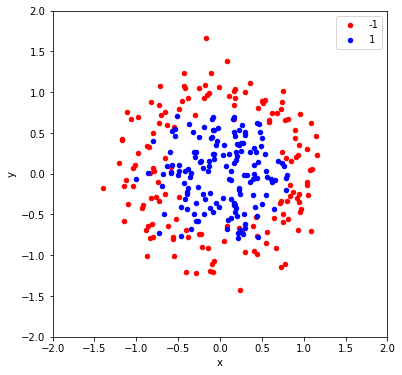

In [ ]:
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt
from pandas import DataFrame

# generate 2d classification dataset
X, y = make_circles(n_samples=300, noise=0.2, random_state=101, factor=0.5)
y = y*2 - 1
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {-1:'red', 1:'blue'}
fig, ax = plt.subplots(figsize=(6,6))
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()

In [ ]:
def plot_data(X, y, h, ax):
    '''Plotting function. The function will plot the given instances as well will color the
    background according to the decision boundaries of the model.
    X - 2D array
    y - Vector of labels
    h - A function which accepts X and returns the predicted labels. It should be based on the trained model.
    ax - axes.Axes object as returned by matplotlib.pyplot.subplots function.'''
    def make_meshgrid(x, y, h=.01):
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
        return xx, yy
  
    def plot_contours(ax, clf, xx, yy, **params):
        Z = h(np.c_[xx.ravel(), yy.ravel()])  # predictions
        Z = Z.reshape(xx.shape)
        if 'levels' in params and len(params['levels'])<2:
          out = ax.contour(xx, yy, Z, **params, colors='k', edgesize=10)
        else:
          out = ax.contourf(xx, yy, Z, **params)
        return out
  
    # scatter plot, dots colored by class value
    df = DataFrame(dict(x0=X[:,0], x1=X[:,1], label=y))
    colors = {-1:'red', 1:'blue'}
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x0', y='x1', 
                 alpha=0.5, label=key, color=colors[key])
  
    # decision boundary
    xx1, xx2 = make_meshgrid(X[:,0], X[:,1])
    plot_contours(ax, h, xx1, xx2, alpha=0.2)#, levels=[0.5])
  
    ax.axis('scaled')

#### Answer


for n = 1, score of the AdaBoost=0.45454545454545453
for n = 1, mean of estimator_errors_=0.4776119402985075

for n = 3, score of the AdaBoost=0.47474747474747475
for n = 3, mean of estimator_errors_=0.46434522536820017

for n = 10, score of the AdaBoost=0.6565656565656566
for n = 10, mean of estimator_errors_=0.4601065477798797

for n = 50, score of the AdaBoost=0.6161616161616161
for n = 50, mean of estimator_errors_=0.7856795829818712

for n = 100, score of the AdaBoost=0.6161616161616161
for n = 100, mean of estimator_errors_=0.8928397914909357

for n = 1000, score of the AdaBoost=0.6161616161616161
for n = 1000, mean of estimator_errors_=0.9892839791490935

for n = 10000, score of the AdaBoost=0.6161616161616161
for n = 10000, mean of estimator_errors_=0.9989283979149093



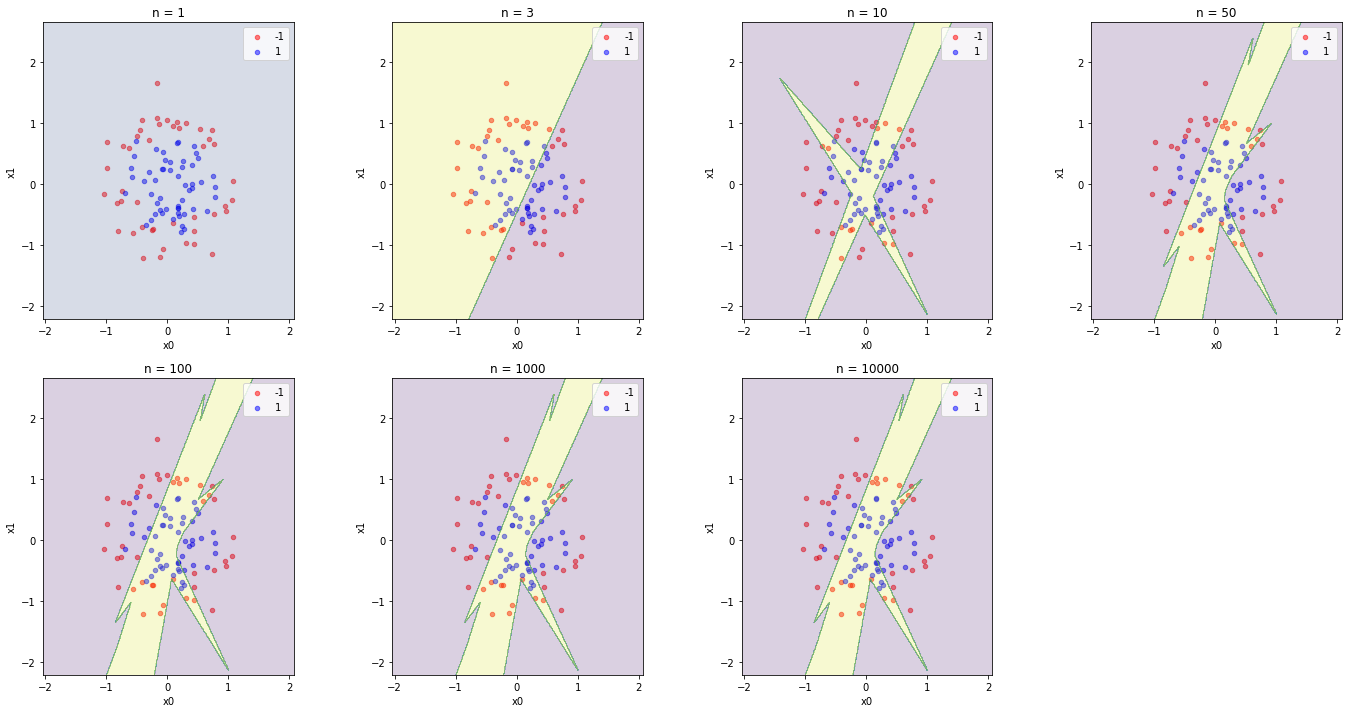

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

n = [1,3,10,50,100,1000,10000]
fig = plt.figure(figsize=(24,12))
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33)

for i,weak_learn_num in enumerate(n):
  svc_estimator = LinearSVC(tol=1e-5,loss='hinge', C=1e5, max_iter=1e6)
  clf = AdaBoostClassifier(base_estimator=svc_estimator, n_estimators=weak_learn_num, algorithm='SAMME')
  clf.fit(X_train,y_train)
  ax = plt.subplot(2,4,i+1%2)
  ax.set_title(f'n = {weak_learn_num}')
  plot_data(X_test,y_test,clf.predict,ax)

  print(f'for n = {weak_learn_num}, score of the AdaBoost={clf.score(X_test, y_test)}')
  print(f'for n = {weak_learn_num}, mean of estimator_errors_={np.mean(clf.estimator_errors_)}')
  print()
  



---

Answers:

1. We executed the code multiple times, since each time the train\test points are chosen randomly, so we got different scores. 
In some cases we saw that the score hasn't changed when it reached a certain value of n. That could identify the convergence from this point. 
In other cases, we saw that for a certain value of n (that is not 1 nor 10000) we recieve the maximum score, and for greater values the score decreases. This could identify an overfit situation.  
2. As we mentioned in the previous answer, we can check for the minimal value of n that matches the maximum score. 
3. For this specific task, we think that the optimal number of estimators is 50. That is because from the multiple executions we performed, we saw that most of the times, the combination of score and mean_estimators_errors was the optimal. Meaning, we recevied relatively high score, and relatively low mean error. 

# Kaggle competition
If you participated in the Kaggle competition
https://www.kaggle.com/t/3c2cb35d174c287b7fcaf1c716f523ef
Write your team name below

In [ ]:
# My team name was: